# NSL Notebook 05

In [1]:
from default import *

## Exercise 05.1.1

Here we want to apply **Metropolis algo** to compute density probabilities of hydrogen atom eigenfunctions $ \psi_{100}(r)$ and $\psi_{210}(r)$ and with them calculate using **MC** integration some mean values for position observable $\langle r \rangle_{100}$ and $\langle r \rangle_{210}$

For **Metropolis algo** is very important:

* the starting position
* the transition matrix choice
* initial equilibration

In this exercise the transition matrix is composed by random "uniform" probabilities from $[-\epsilon, \epsilon]$ where $\epsilon$ has been chosen to satisfy the "50% empirical rule" of metropolis algo, instead the origin of axes $r=\{0,\,0,\,0\}$ has been chosen as starting point. 

For the equilibration part, I evolve the positions over $5*10^4$ metropolis steps, and then continued with the simulation with $10^5$ metropolis steps and at each step compute the **MC** integration using blocking method, with $100$ blocks, to estimate uncertainties.

The theoretically results are:

$$ \langle r \rangle_{100}=1.5\,a_0 \qquad \langle r \rangle_{210}=5\,a_0 $$

so both the moving averages plotted below, approximate quite well the expected results.

What would happen if the simulation had started away from the origin?

Starting away from origin $>100\,a0$, the **metropolis algo** may be more prone to errors when finding the correct probability path, beacuse for both the eigenfunctions the max probability is at most at $5\,a_0$ and so it's very difficult to find the correct random steps lenght to reach the convergence. And so the mean values move from the theoretically results.

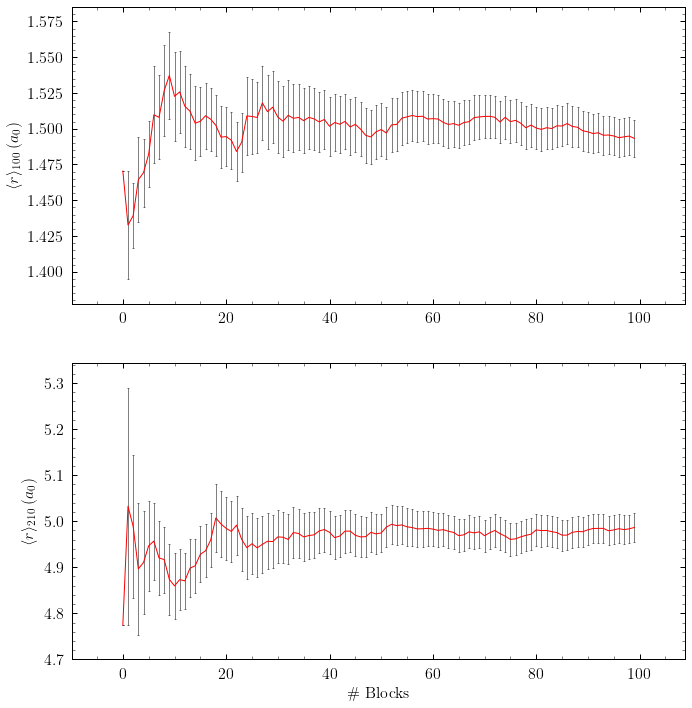

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,12))

a0 = 0.0529 # Bohr radius nm

# load <r>_{100} results
df1 = pd.read_csv("r-100-blk.csv", header=None, names=["mean","mean_err"])/a0
df1["mean"].plot.line(yerr=df1["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.5,
                      ax=ax1)

# load <r>_{210} results
df2 = pd.read_csv("r-210-blk.csv", header=None, names=["mean","mean_err"])/a0
df2["mean"].plot.line(yerr=df2["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.5, 
                      ax=ax2)

ax1.set_ylabel("$\\langle r \\rangle_{100}\;(a_0)$");
ax2.set_ylabel("$\\langle r \\rangle_{210}\;(a_0)$");

ax2.set_xlabel("\# Blocks");

## Exercise 05.1.2

Here instead the same metropolis simulation as in **Exercise 05.1.1** but using a transition matrix composed by gaussian probability with $\mu=0$ and $\sigma=\epsilon$ to satisfy the "50% empirical rule" of metropolis algo. 

The same simulation parameter were used, so $5*10^4$ for equilibration, origin as starting point, and $10^5$ for simulation using $100$ blocks.

The results are quite similar, testifying metropolis algorithm achieves the convergence with both of them, maybe the first one (random) has best performance.

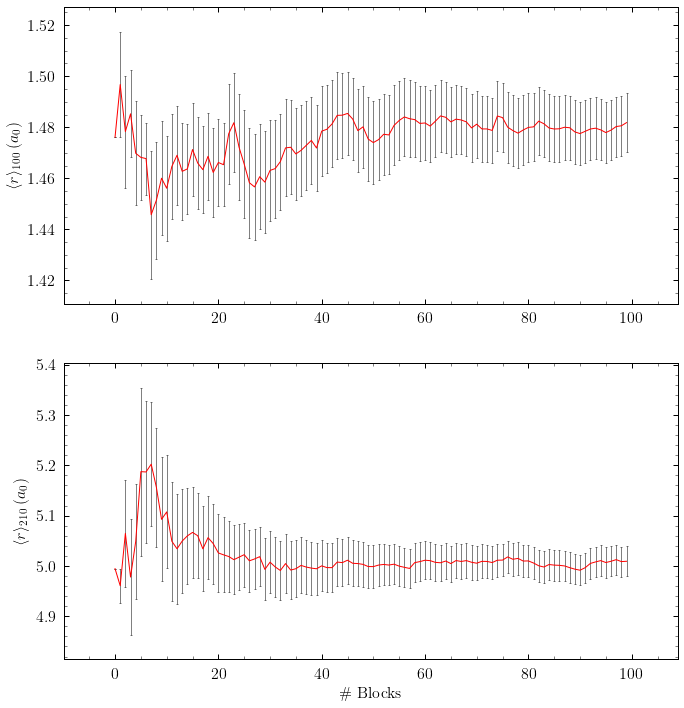

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,12))

a0 = 0.0529 # Bohr radius nm

# load <r>_{100} results
df1 = pd.read_csv("r-g-100-blk.csv", header=None, names=["mean","mean_err"])/a0
df1["mean"].plot.line(yerr=df1["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.5, 
                      ax=ax1)

# load <r>_{210} results
df2 = pd.read_csv("r-g-210-blk.csv", header=None, names=["mean","mean_err"])/a0
df2["mean"].plot.line(yerr=df2["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.5, 
                      ax=ax2)

ax1.set_ylabel("$\\langle r \\rangle_{100}\;(a_0)$");
ax2.set_ylabel("$\\langle r \\rangle_{210}\;(a_0)$");

ax2.set_xlabel("\# Blocks");